In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import uniform
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
velocity = pd.read_excel("2223G3-SDIA-Galaxy.xlsx",index_col=None, header=None).to_numpy().ravel()
velocity = np.array(velocity,dtype = float)

(array([7.28588956e-05, 2.91435583e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.91435583e-05, 0.00000000e+00, 0.00000000e+00, 8.74306748e-05,
        2.33148466e-04, 1.74861350e-04, 5.82871165e-05, 1.45717791e-04,
        1.02002454e-04, 1.02002454e-04, 7.28588956e-05, 1.45717791e-05,
        0.00000000e+00, 2.91435583e-05, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.45717791e-05,
        1.45717791e-05, 1.45717791e-05]),
 array([ 9172. , 10008.9, 10845.8, 11682.7, 12519.6, 13356.5, 14193.4,
        15030.3, 15867.2, 16704.1, 17541. , 18377.9, 19214.8, 20051.7,
        20888.6, 21725.5, 22562.4, 23399.3, 24236.2, 25073.1, 25910. ,
        26746.9, 27583.8, 28420.7, 29257.6, 30094.5, 30931.4, 31768.3,
        32605.2, 33442.1, 34279. ]),
 <a list of 30 Patch objects>)

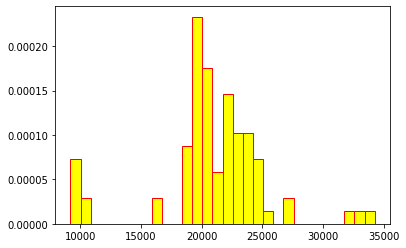

In [3]:
plt.hist(velocity,bins = 30, density = True, color = 'yellow', edgecolor = "red")

In [10]:
import pdb
nbMaxIterations = 20
# mu_em = np.array([-0.0156, -4.9148, 5.9692])
# sigma_em = np.array([1.3395, 1.3395, 1.3395])
# alpha_em = np.array([0.4800, 0.2200, 0.3000])

mu_em = np.array([10000.,23000.,33000.])
sigma_em = np.array([100.,100.,100.])
alpha_em = np.array([0.25,0.5,0.25])


nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbDonnees = len(velocity)  #Nombre de données
p = np.zeros(shape=(nbComposante, nbDonnees))
#Déclaration et initialisation de la matrice qui va contenir les probabilités
#p(k|x,theta_courant)
nbEchantillon = len(velocity)                
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
donneesP = np.zeros(shape=(nbEchantillon))
donnees = np.copy(velocity)

while nbIteration < nbMaxIterations:
    for n in range(0, nbDonnees, 1):
        for k in range(0, nbComposante, 1):
            p[k, n] = alpha_em[k] * norm.pdf(x = donnees[n], loc = mu_em[k], scale = sigma_em[k])
        p[:, n] = p[:, n] / np.sum(p[:, n])
    for k in range(0, nbComposante, 1):
        alpha_em_new[k] = np.sum(p[k,:]) / nbDonnees
        for n in range(0, nbDonnees, 1):
            donneesP[n] = donnees[n] * p[k, n]
        mu_em_new[k]  = np.sum(donneesP) / np.sum(p[k, :])
        for n in range(nbDonnees):
            donneesP[n] = ((donnees[n] - mu_em_new[k]) ** 2) * p[k, n]
        sigma_em_carre_new[k] = np.sum(donneesP) / np.sum(p[k, :])
    mu_em = mu_em_new
    sigma_em = np.sqrt(sigma_em_carre_new)
    alpha_em = alpha_em_new
    nbIteration = nbIteration + 1

C:\Users\victo\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


In [9]:
nbMaxIterations = 20
# mu_em = np.array([-0.0156, -4.9148, 5.9692])
# sigma_em = np.array([1.3395, 1.3395, 1.3395])
# alpha_em = np.array([0.4800, 0.2200, 0.3000])

mu_em = np.array([10000,23000,33000])
sigma_em = np.array([100,100,100])
alpha_em = np.array([0.25,0.5,0.25])


nbIteration = 1 #Initialisation de la variable d'arrêt
nbComposante = len(alpha_em) #Nombre de composantes du mélange
nbDonnees = len(velocity)  #Nombre de données
p = np.zeros(shape=(nbComposante, nbDonnees))
#Déclaration et initialisation de la matrice qui va contenir les probabilités
#p(k|x,theta_courant)
nbEchantillon = len(velocity)                
alpha_em_new = alpha_em
sigma_em_carre_new = sigma_em
mu_em_new = mu_em
donneesP = np.zeros(shape=(nbEchantillon))
donnees = np.copy(velocity)

(donnees/10000)[5]*p[0,1]

0.0